<a href="https://colab.research.google.com/github/sturu1/github-first/blob/master/2020_06_29_%EC%98%A4%ED%9B%84%EC%88%98%EC%97%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution 알아보기 p139
1. 이미지에서 convolution이 어떻게 유용한가?
2. Gaussian 스무딩(흐릿한이미지), 부드러운 이미지 만들어 보기
3. Sobel 미분필터, X축, Y축 편미분, 윤곽선 검출해보기


* 이미지 편미분 원리


![대체 텍스트](https://mblogthumb-phinf.pstatic.net/20150916_85/roboholic84_1442364979771XXm8h_PNG/filters.png?type=w2)


*  최종적으로 얻는 그레디언트 벡터(x편미분, y편미분)


$\nabla f = {\frac{\partial f(x, y)}{\partial_x}}, {\frac{\partial I(x, y)}{\partial_y}}$


* 윤곽선

$|G| = \sqrt{G^2_x * g^2_y}$

이미지 데이터이기때문에 컨볼루션을 사용해서 압축하는것


#$\frac{1}{2}$

uint8 (28, 28) 255 0
float32 (28, 28) 943.0 -981.0
float32 (28, 28) 1.0 0.0


<Figure size 432x288 with 0 Axes>

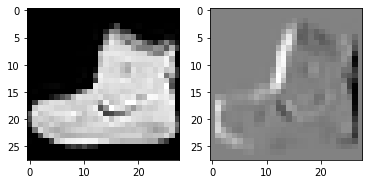

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math
import tensorflow as tf


#데이터를 가져와보자
fashion_mnist = tf.keras.datasets.fashion_mnist #데이터와 연결
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data() # 실제로 데이터 가져옴

#=================filter정의

#sobel filter for Gx
kernelX = [[-1, 0, 1],
           [-2, 0, 2],
           [-1, 0, 1]]
kernelX = np.array(kernelX) # convert to numpy
kernelX.shape

#sobel filter for Gy
kernelY = [[1, 2, 1],
           [0, 0, 0],
           [-1, -2, -1]]
kernelY = np.array(kernelY)
kernelY.shape

#===========함수정의
#정규화 min-max noralize
def normalize(x):
  return (x - np.min(x)) / (np.max(x) - np.min(x))

# 이미지 차원 nX,nY
def getDimension(x):
  # 입력 이미지 x는 2차원이라고 가정
  return x.shape[0], x.shape[1] #nY, nX


def convolution(kernel, img):
  kY, kX = getDimension(kernel) #3*3
  nY, nX = getDimension(img) #28*28
  
  templmg = np.zeros((nY, nX), dtype = 'float32')

  for j in range(1, nY-1):# for domain Y
    for i in range(1,nX-1):# for domain X
      #kernel dimension, iterator k, l
      for l in range(0, kY):#0~2, 3개
        for k in range(0, kX):#0~2, 3개
        #컨볼루션 수행해서 temlmg에 맵핑해주면 됨
          templmg[i, j] += img[i + k-1, j+l-1]* kernel[k, l] #convolution 수행


  return templmg

#================ 메인코드 시작
npImg = train_X[0]
print(npImg.dtype, npImg.shape, np.max(npImg), np.min(npImg))

dX = convolution(kernelX, npImg)#컨볼루션 x미분 수행하여 dX획득
print(dX.dtype, dX.shape, np.max(dX), np.min(dX))

dX = normalize(dX)#정규화를 통하여 0~1스케일로 다시 변환
print(dX.dtype, dX.shape, np.max(dX), np.min(dX))

#가시화를 위해서 이미지 값 스케일업
dX = dX * 255.0
dX = dX.astype(np.uint16)#더 큰 값을 담을 수 있도록 형 변환

#가시화
plt.figure()
f, axarr = plt.subplots(1, 2)
axarr[0].imshow(npImg, cmap='gray')
axarr[1].imshow(dX, cmap='gray')